# 5.2 **Обучение сверточной нейронной сети с нуля**

## Загрузка данных

In [1]:
import os, shutil

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
original_dataset_dir = '/content/drive/MyDrive/cats_vs_dogs_data/train'

In [4]:
base_dir = '/content/drive/MyDrive/cats_vs_dogs_small'

In [ ]:
os.mkdir(base_dir)

In [5]:
def mk_dir(name):
    if(os.path.isdir(name)==False):
        os.mkdir(name)

In [6]:
train_dir = os.path.join(base_dir, 'train')
mk_dir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
mk_dir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
mk_dir(test_dir)

In [7]:
train_cats_dir = os.path.join(train_dir, 'cats')
mk_dir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
mk_dir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
mk_dir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
mk_dir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
mk_dir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
mk_dir(test_dogs_dir)

In [ ]:
fnames = [f'cat.{i}.jpg' for i in range(2000)]
for fname in fnames:
  if os.path.isfile(f'/content/drive/MyDrive/cats_vs_dogs_data/train/{fname}') == True:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
  else:
    continue

fnames = [f'cat.{i}.jpg' for i in range(2000, 3000)]
for fname in fnames:
  if os.path.isfile(f'/content/drive/MyDrive/cats_vs_dogs_data/train/{fname}') == True:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
  else:
    continue

fnames = [f'cat.{i}.jpg' for i in range(3000, 4000)]
for fname in fnames:
  if os.path.isfile(f'/content/drive/MyDrive/cats_vs_dogs_data/train/{fname}') == True:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
  else:
    continue

fnames = [f'dog.{i}.jpg' for i in range(2000)]
for fname in fnames:
  if os.path.isfile(f'/content/drive/MyDrive/cats_vs_dogs_data/train/{fname}') == True:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
  else:
    continue

fnames = [f'dog.{i}.jpg' for i in range(2000, 3000)]
for fname in fnames:
  if os.path.isfile(f'/content/drive/MyDrive/cats_vs_dogs_data/train/{fname}') == True:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
  else:
    continue

fnames = [f'dog.{i}.jpg' for i in range(3000, 4000)]
for fname in fnames:
  if os.path.isfile(f'/content/drive/MyDrive/cats_vs_dogs_data/train/{fname}') == True:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
  else:
    continue

In [ ]:
fnames = [f'dog.{i}.jpg' for i in range(2000)]
for fname in fnames:
  if os.path.isfile(f'/content/drive/MyDrive/cats_vs_dogs_data/train/{fname}') == True:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
  else:
    continue

fnames = [f'dog.{i}.jpg' for i in range(2000, 3000)]
for fname in fnames:
  if os.path.isfile(f'/content/drive/MyDrive/cats_vs_dogs_data/train/{fname}') == True:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
  else:
    continue

fnames = [f'dog.{i}.jpg' for i in range(3000, 4000)]
for fname in fnames:
  if os.path.isfile(f'/content/drive/MyDrive/cats_vs_dogs_data/train/{fname}') == True:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
  else:
    continue

In [ ]:
os.path.isfile(f'/content/drive/MyDrive/cats_vs_dogs_data/train/dog.1.jpg')

True

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 2000
total validation cat images: 1000
total test cat images: 1000
total training dog images: 2000
total validation dog images: 1000
total test dog images: 1000


## Базовая модель

In [8]:
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
from tensorflow.keras import optimizers
optimizer=optimizers.Adam(learning_rate=0.0001)

In [ ]:
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Генератор бинарных изображений

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=200,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=100)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
200/200 [==============================] - 984s 5s/step - loss: 0.6826 - accuracy: 0.5500 - val_loss: 0.6468 - val_accuracy: 0.6470
Epoch 2/10
200/200 [==============================] - 30s 152ms/step - loss: 0.6323 - accuracy: 0.6382 - val_loss: 0.5982 - val_accuracy: 0.6775
Epoch 3/10
200/200 [==============================] - 30s 150ms/step - loss: 0.5631 - accuracy: 0.7120 - val_loss: 0.5513 - val_accuracy: 0.7175
Epoch 4/10
200/200 [==============================] - 30s 150ms/step - loss: 0.5189 - accuracy: 0.7418 - val_loss: 0.5238 - val_accuracy: 0.7340
Epoch 5/10
200/200 [==============================] - 30s 149ms/step - loss: 0.4742 - accuracy: 0.7775 - val_loss: 0.5191 - val_accuracy: 0.7385
Epoch 6/10
200/200 [==============================] - 30s 149ms/step - loss: 0.4354 - accuracy: 0.7985 - val_loss: 0.4854 - val_accuracy: 0.7560
Epoch 7/10
200/200 [==============================] - 30s 149ms/step - loss: 0.4007 - accuracy: 0.8183 - val_loss: 0.5476 - val_accu

In [ ]:
model.save('cats_and_dogs_small_1.h5')

Точность 70% и быстрое переобучение

<Figure size 432x288 with 0 Axes>

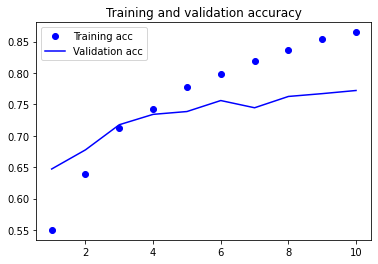

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


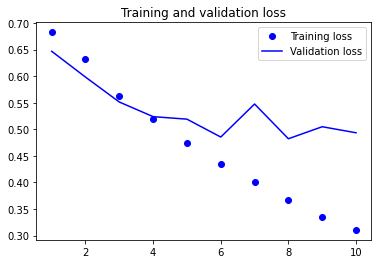

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Расширение данных и прореживание

In [12]:
datagen = ImageDataGenerator(
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest')

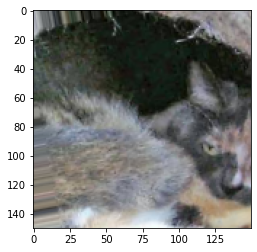

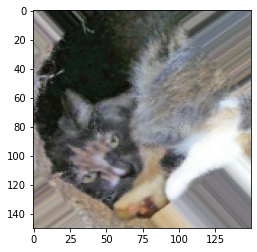

In [ ]:
import matplotlib.pyplot as plt

from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
 fname in os.listdir(train_cats_dir)]

img_path = fnames[3] 

img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
 plt.figure(i)
 imgplot = plt.imshow(image.array_to_img(batch[0]))
 i += 1
 if i > 1:
   break
plt.show()

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
optimizer=optimizers.Adam(learning_rate=0.0001)

In [15]:
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['acc'])

In [16]:
train_datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [17]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=200,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=100)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
200/200 [==============================] - 1187s 6s/step - loss: 0.6898 - acc: 0.5257 - val_loss: 0.6691 - val_acc: 0.5815
Epoch 2/10
200/200 [==============================] - 51s 255ms/step - loss: 0.6599 - acc: 0.6020 - val_loss: 0.6466 - val_acc: 0.6095
Epoch 3/10
200/200 [==============================] - 51s 255ms/step - loss: 0.6427 - acc: 0.6325 - val_loss: 0.6007 - val_acc: 0.6830
Epoch 4/10
200/200 [==============================] - 51s 255ms/step - loss: 0.6185 - acc: 0.6535 - val_loss: 0.5881 - val_acc: 0.6950
Epoch 5/10
200/200 [==============================] - 51s 253ms/step - loss: 0.6004 - acc: 0.6780 - val_loss: 0.5751 - val_acc: 0.6980
Epoch 6/10
200/200 [==============================] - 51s 255ms/step - loss: 0.5901 - acc: 0.6845 - val_loss: 0.5639 - val_acc: 0.7070
Epoch 7/10
200/200 [==============================] - 51s 256ms/step - loss: 0.5820 - acc: 0.6858 - val_loss: 0.5662 - val_acc: 0.7125
Epoch 8/10
200/200 [==============================] - 51

In [18]:
model.save('/content/drive/MyDrive/Учим нейросети/Франсуа Шолле Глубокое обучение на Python/cats_and_dogs_small_2.h5')

<Figure size 432x288 with 0 Axes>

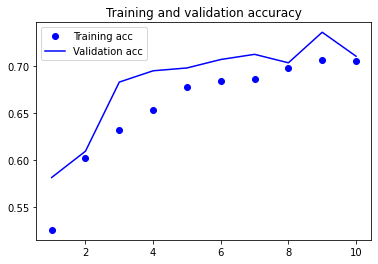

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


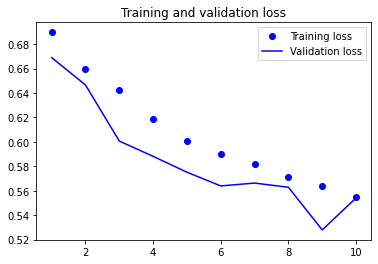

In [20]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# 5.3 **Использование предварительно обученной сверточной нейронной сети**

## Выделение признаков

In [ ]:
# Создание экземпляра сверточной основы архитектуры VGG16

from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

### Быстрое выделение признаков без расширения данных

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/Users/fchollet/Downloads/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)

batch_size = 20
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
        return features, labels

In [ ]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [ ]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=80,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/80
100/100 [==============================] - 1s 7ms/step - loss: 0.6816 - acc: 0.9965 - val_loss: 0.6695 - val_acc: 0.9910
Epoch 2/80
100/100 [==============================] - 1s 5ms/step - loss: 0.6349 - acc: 0.9980 - val_loss: 0.6153 - val_acc: 0.9910
Epoch 3/80
100/100 [==============================] - 0s 5ms/step - loss: 0.5851 - acc: 0.9990 - val_loss: 0.5666 - val_acc: 0.9930
Epoch 4/80
100/100 [==============================] - 1s 5ms/step - loss: 0.5304 - acc: 1.0000 - val_loss: 0.5173 - val_acc: 0.9920
Epoch 5/80
100/100 [==============================] - 1s 5ms/step - loss: 0.4688 - acc: 1.0000 - val_loss: 0.4656 - val_acc: 0.9910
Epoch 6/80
100/100 [==============================] - 1s 5ms/step - loss: 0.4054 - acc: 1.0000 - val_loss: 0.4001 - val_acc: 0.9910
Epoch 7/80
100/100 [==============================] - 0s 5ms/step - loss: 0.3446 - acc: 1.0000 - val_loss: 0.3499 - val_acc: 0.9910
Epoch 8/80
100/100 [==============================] - 0s 5ms/step - loss: 0.

<Figure size 432x288 with 0 Axes>

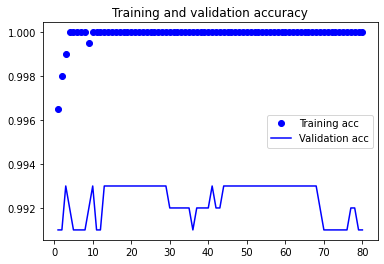

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


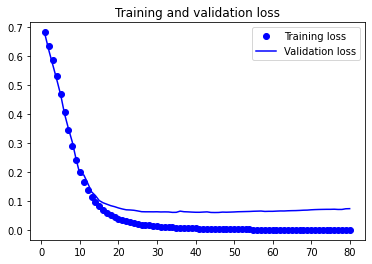

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Выделение признаков с расширением данных

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('This is the number of trainable weights '
 'before freezing the conv base:', len(model.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable weights '
 'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [ ]:
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 30s 295ms/step - loss: 0.4769 - accuracy: 0.7745 - val_loss: 0.3099 - val_accuracy: 0.8620
Epoch 2/10
100/100 [==============================] - 30s 299ms/step - loss: 0.3887 - accuracy: 0.8220 - val_loss: 0.2895 - val_accuracy: 0.8660
Epoch 3/10
100/100 [==============================] - 30s 304ms/step - loss: 0.3525 - accuracy: 0.8430 - val_loss: 0.2525 - val_accuracy: 0.8930
Epoch 4/10
100/100 [==============================] - 30s 300ms/step - loss: 0.3317 - accuracy: 0.8515 - val_loss: 0.2721 - val_accuracy: 0.8860
Epoch 5/10
100/100 [==============================] - 29s 294ms/step - loss: 0.3205 - accuracy: 0.8660 - val_loss: 0.3618 - val_accuracy: 0.8400
Epoch 6/10
100/100 [==============================] - 29s 294ms/step - loss: 0.3255 - accuracy: 0.8515 - val_loss: 0.3546 - val_accuracy: 0.8500
Epoch 7/10
100/100 [==============================] - 29s 293ms/step - loss: 0.3317 - accuracy: 0.8560 - val_loss: 0.2400 - val_ac

<Figure size 432x288 with 0 Axes>

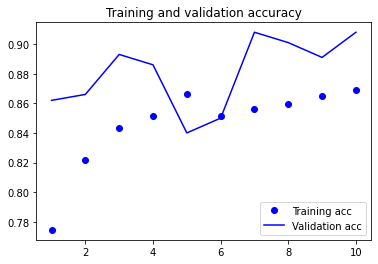

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


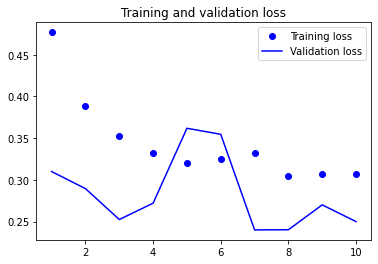

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Дообучение

In [ ]:
#Замораживание всех слоев, кроме последних
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.00001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100, # Уменьшил, чтобы меньше обучалось (GPU недоступен)
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 32s 308ms/step - loss: 0.3263 - accuracy: 0.8585 - val_loss: 0.2621 - val_accuracy: 0.8920
Epoch 2/20
100/100 [==============================] - 31s 305ms/step - loss: 0.2723 - accuracy: 0.8825 - val_loss: 0.2339 - val_accuracy: 0.9080
Epoch 3/20
100/100 [==============================] - 31s 307ms/step - loss: 0.2479 - accuracy: 0.8955 - val_loss: 0.2107 - val_accuracy: 0.9170
Epoch 4/20
100/100 [==============================] - 31s 305ms/step - loss: 0.2305 - accuracy: 0.8985 - val_loss: 0.2064 - val_accuracy: 0.9120
Epoch 5/20
100/100 [==============================] - 30s 303ms/step - loss: 0.2269 - accuracy: 0.9025 - val_loss: 0.1710 - val_accuracy: 0.9290
Epoch 6/20
100/100 [==============================] - 30s 303ms/step - loss: 0.2088 - accuracy: 0.9135 - val_loss: 0.1928 - val_accuracy: 0.9290
Epoch 7/20
100/100 [==============================] - 30s 304ms/step - loss: 0.1981 - accuracy: 0.9165 - val_loss: 0.2100 - val_ac

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<Figure size 432x288 with 0 Axes>

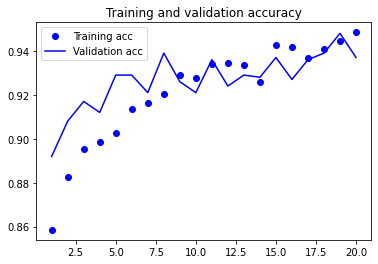

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


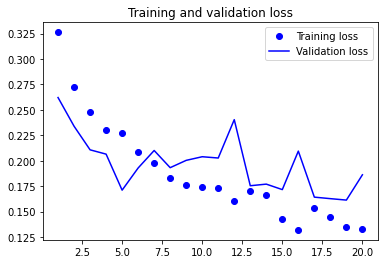

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Сгладим скользящим средним

In [ ]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

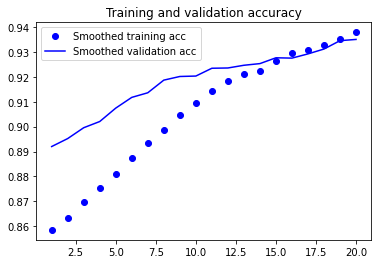

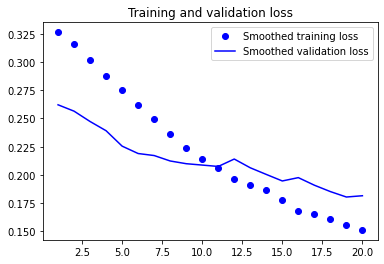

In [ ]:
plt.plot(epochs,
 smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
 smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,
 smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
 smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
 test_dir,
 target_size=(150, 150),
 batch_size=20,
 class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 2000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test acc: 0.9490000009536743


# **Визуализация знаний, заключенных в сверточной нейронной сети**

## Визуализация промежуточных активаций

In [21]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Учим нейросети/Франсуа Шолле Глубокое обучение на Python/cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [24]:
img_path = '/content/drive/MyDrive/cats_vs_dogs_small/test/cats/cat.3001.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
# Его форма (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


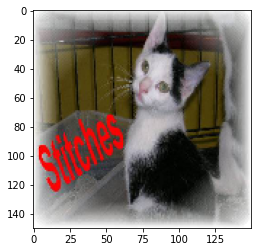

In [29]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [30]:
#Создание экземпляра модели из входного тензора и списка выходных тензоров
#Модель имеет 8 выходов. На вход получает изображение, а на выходе активации на каждом слое модели
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [31]:
activations = activation_model.predict(img_tensor)

In [32]:
# Возьмем для примера активацию первого сверточного слоя для входного изображения кошки:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


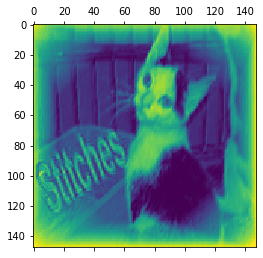

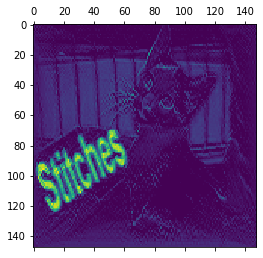

In [39]:
#Визуализация нескольких каналов канала
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')
plt.matshow(first_layer_activation[0, :, :, 25], cmap='viridis')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


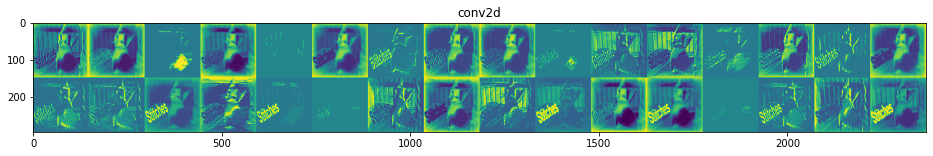

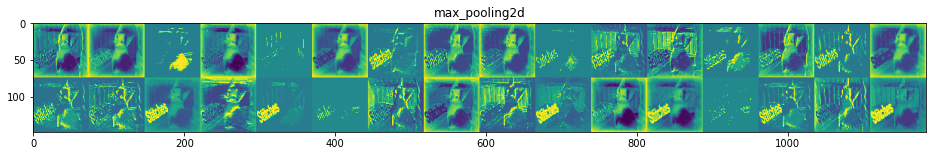

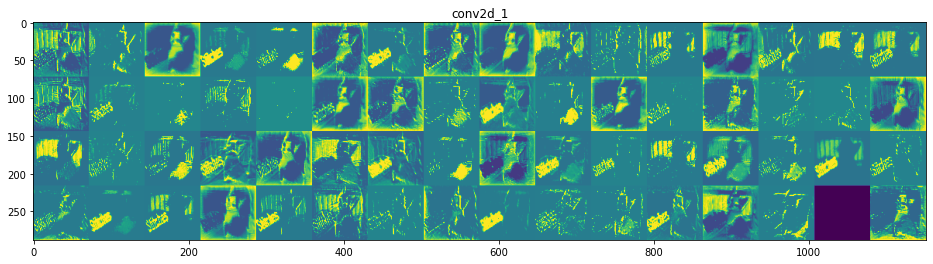

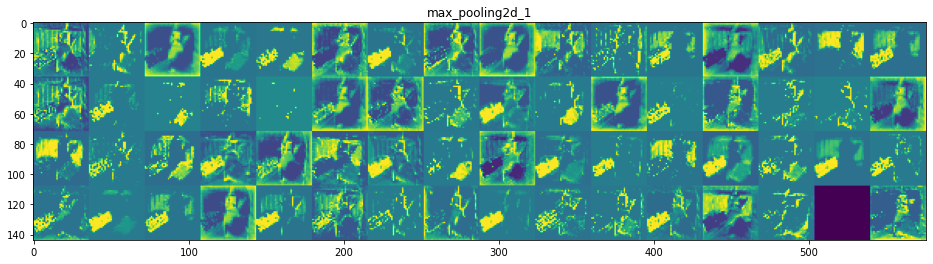

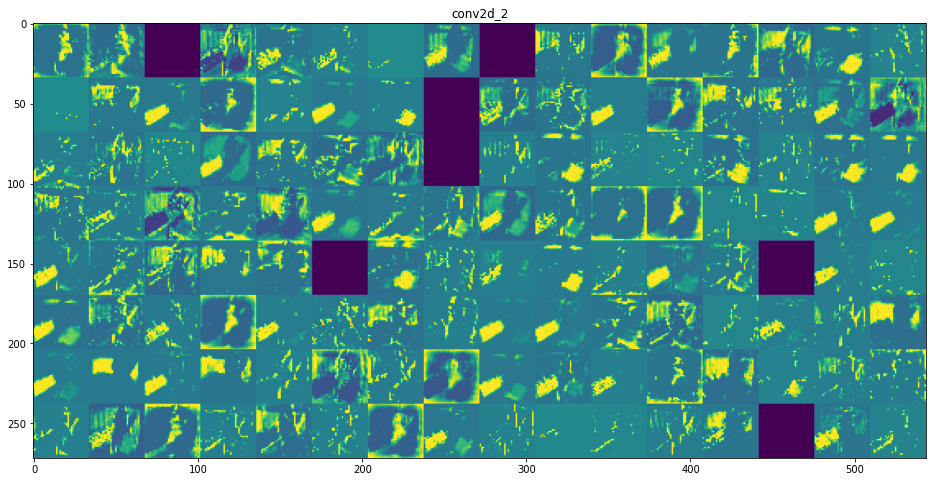

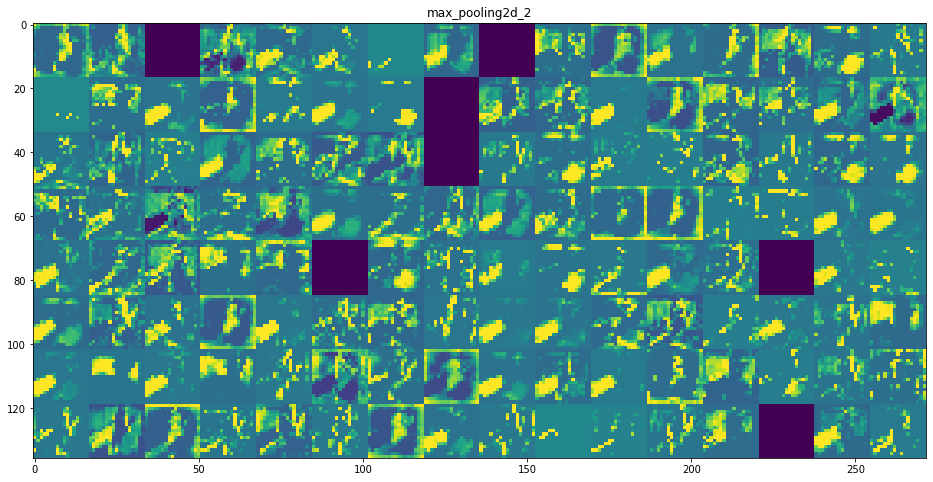

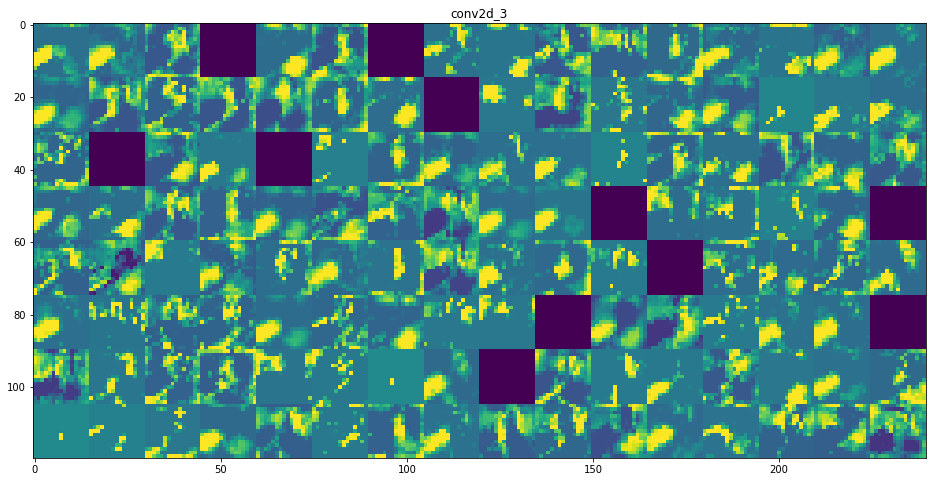

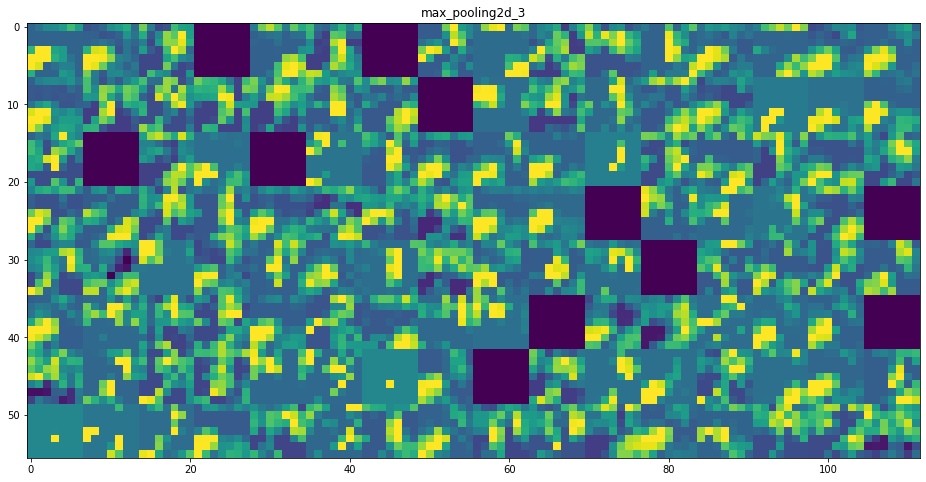

In [47]:
# Визуализация всех каналов для всех промежуточных активаций

layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    
    size = layer_activation.shape[1]

    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                            :, :,
                                            col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                        row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Визуализация фильтров сверточных нейронных сетей

In [52]:
# Определение тензора потерь для визуализации фильтра

from tensorflow.keras.applications import VGG16
from keras import backend as K
from tensorflow import GradientTape
model = VGG16(weights='imagenet',
              include_top=False)
layer_name = 'block3_conv1'
filter_index = 0
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])


In [60]:
#Получение градиента потерь относительно входа модели
GT = GradientTape()
grads = GT.gradients(loss, model.input)

AttributeError: ignored

In [ ]:
# Трюк с нормализацией градиента
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5) 

In [ ]:
# Получение выходных значений Numpy для заданных входных значений Numpy
iterate = K.function([model.input], [loss, grads])

import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [ ]:
# Максимизация потерь стохастическим градиентным спуском

input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

step = 1. # Величина каждого изменения градиента
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step 

In [ ]:
#  Функция преобразования тензора в допустимое изображение

def deprocess_image(x):
  x -= x.mean()
  x /= (x.std() + 1e-5)
  x *= 0.1 
  x += 0.5
  x = np.clip(x, 0, 1)
  x *= 255
  x = np.clip(x, 0, 255).astype('uint8')
  return x 

In [58]:
# Функция, генерирующая изображение, которое представляет фильтр

def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    grads = K.gradients(loss, model.input)[0]

    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    iterate = K.function([model.input], [loss, grads])

    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

In [59]:
 plt.imshow(generate_pattern('block3_conv1', 0))

RuntimeError: ignored